# Scenario 1

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor,ceil
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
import yfinance as yf
warnings.simplefilter('ignore', DeprecationWarning)
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import warnings # 
from collections import Counter 

In [120]:
#Importing the data
df_credit = pd.read_csv("/home/aniketkhanchi/workspace/ML_Projects/EDA/german_credit_data.csv",index_col=0)
df_fred= pd.read_csv("/home/aniketkhanchi/workspace/ML_Projects/EDA/TERMCBCCALLNS.csv",index_col=0)

In [109]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

##### Based on the age group we see 20 to 40 year olds are more exposure to risk when it comes to credit utilisation, let categorize the age groups & see box the box plot for individual scenario.

In [111]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [112]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

##### It is evident the age group young are more exposure to risk when it comes to credit utilisation & therefore resulting in bad credit.

In [114]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

##### Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled) It is highly surpirsing to see highly skilled people falls into bad credit, also we see a linear relationship when it comes to bad credit.

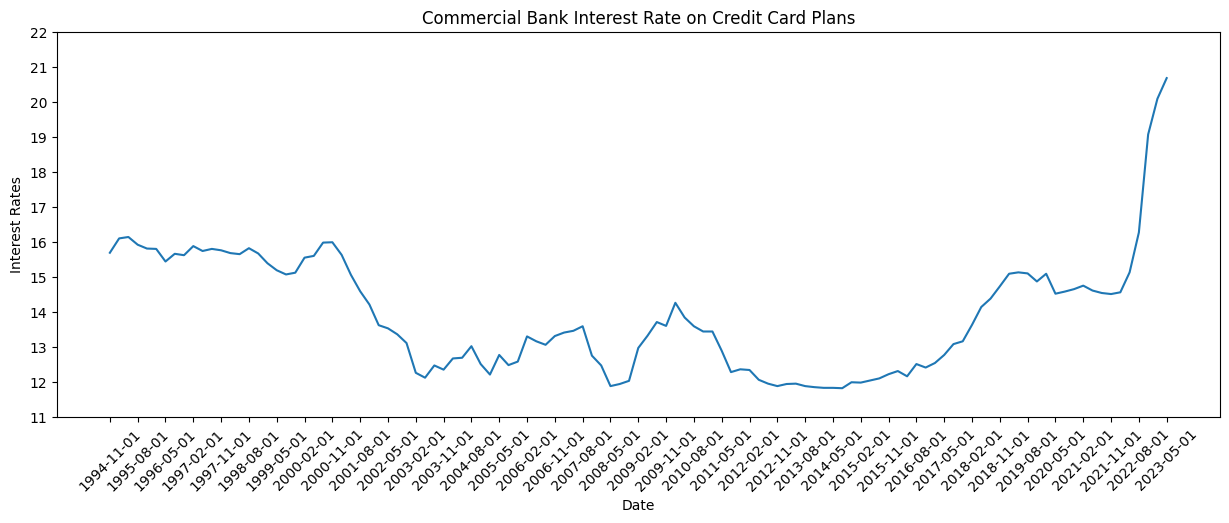

In [145]:
# Remove no data rows
df_fred = df_fred[df_fred["TERMCBCCALLNS"] != '.']
plt.figure(figsize=(15, 5))
# Create a bar graph
plt.plot(df_fred["TERMCBCCALLNS"].astype(float))
plt.yticks(np.arange(11, 23, 1))
plt.xticks(df_fred.index[::3])
# Show the bar graph
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Interest Rates')
plt.title('Commercial Bank Interest Rate on Credit Card Plans')
plt.show()

When the Federal Reserve raises or lowers interest rates, credit card interest rates adjust too & vice versa, therefore lender can keep a track of fed rate before lending money on a unsecured purchase such as credit card.

# Scenario 4

In [136]:
# Define the ticker symbol for Netflix (NFLX)
ticker = "NFLX"

# Define the start and end dates for the data
start_date = "2018-07-11"
end_date = "2023-07-11"

# Retrieve the stock data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)
data_mkt = yf.download("SPY",start=start_date, end=end_date)
# Print the retrieved data
print(data_mkt.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-07-11  277.149994  278.040009  276.519989  276.859985  254.438583   
2018-07-12  278.279999  279.429993  277.600006  279.369995  256.745270   
2018-07-13  279.170013  279.929993  278.660004  279.589996  256.947449   
2018-07-16  279.640015  279.799988  278.839996  279.339996  256.717773   
2018-07-17  278.470001  280.910004  278.410004  280.470001  257.756256   

              Volume  
Date                  
2018-07-11  77054700  
2018-07-12  60124700  
2018-07-13  48216000  
2018-07-16  48201000  
2018-07-17  52315500  


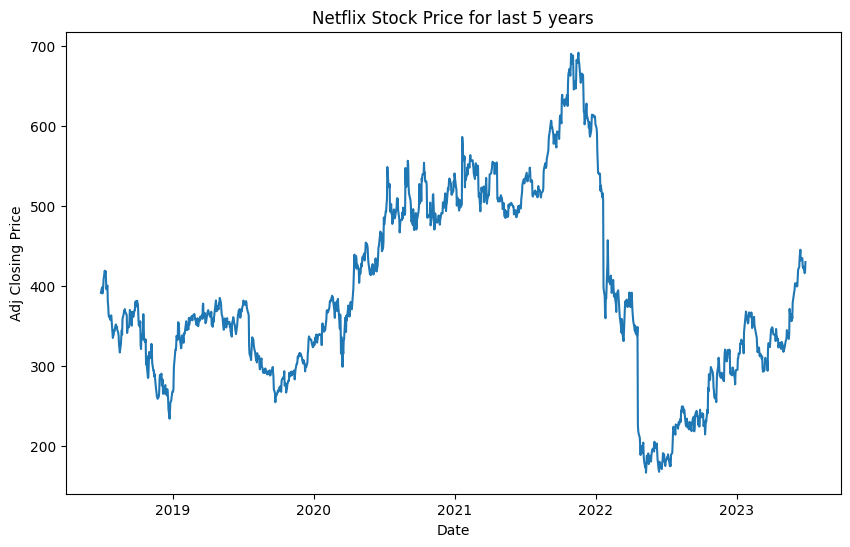

In [132]:
# Plot the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.title('Netflix Stock Price for last 5 years')
plt.show()

Netflix had been a stock for the decade, despite the good fundamentals of the stock, there has been many annual fluctuations.

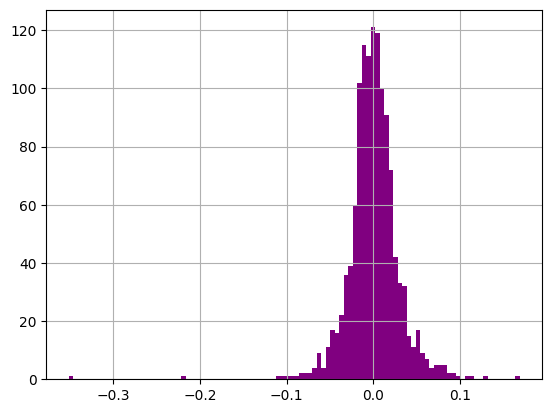

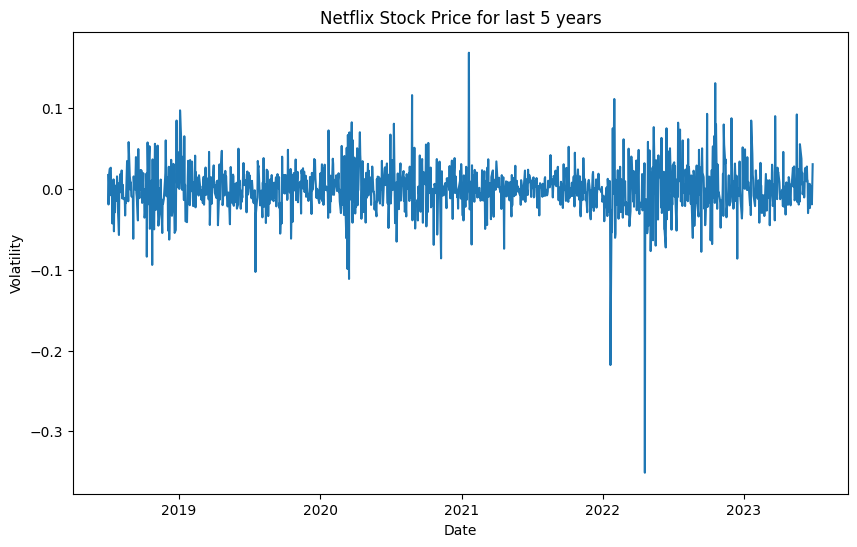

In [133]:
# Calculate volatility (standard deviation of daily returns)
data['vol'] = (data['Adj Close']/data['Adj Close'].shift(1)) - 1
data['vol'].hist(bins=100, color='purple');
plt.figure(figsize=(10, 6))
plt.plot(data['vol'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Netflix Stock Price for last 5 years')
plt.show()

From the above graph, Netlfix share is pretty volatile over the last 5 years.

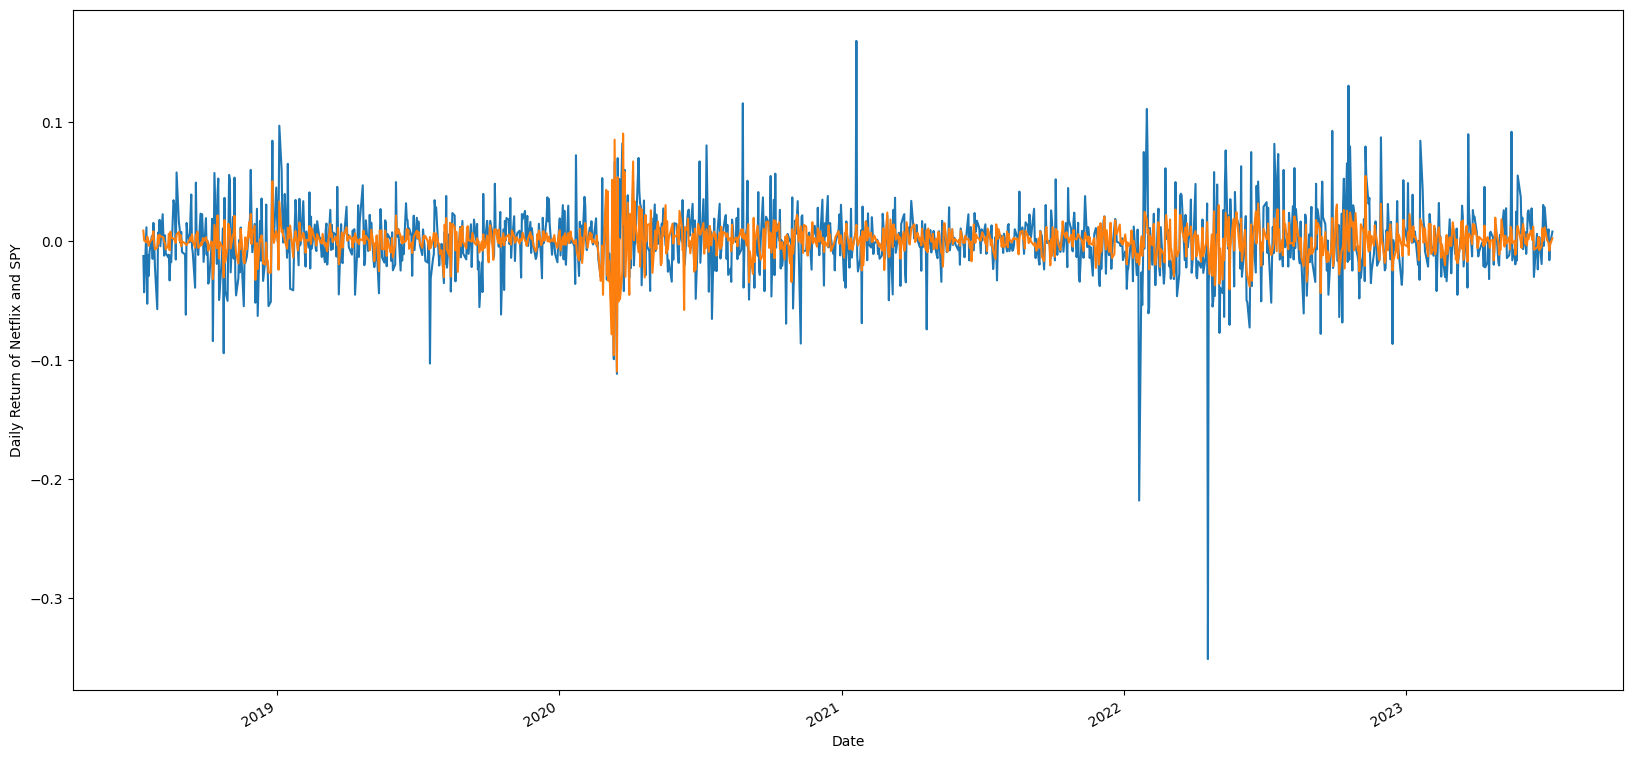

In [137]:
# We have to take the percent changes to get to returns hence we will use .pct_change()
# We do not want the first (0th) element because it is NAN
return_nflx = data.Close.pct_change()[1:]
return_spy = data_mkt.Close.pct_change()[1:]

# We will plot the returns of Google and S&P500 against each other
plt.figure(figsize=(20,10))
return_nflx.plot()
return_spy.plot()
plt.ylabel("Daily Return of Netflix and SPY")
plt.show()

we can see the daily returns of S&P 500 & Netflix is correlated with other.

In [140]:
# Importing libraries and packages
import statsmodels.api as sm
from statsmodels import regression

# Regression model
X = return_spy.values
Y = return_nflx.values

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

alpha: -1.0410565876855984e-05
beta: 1.1153782965320622


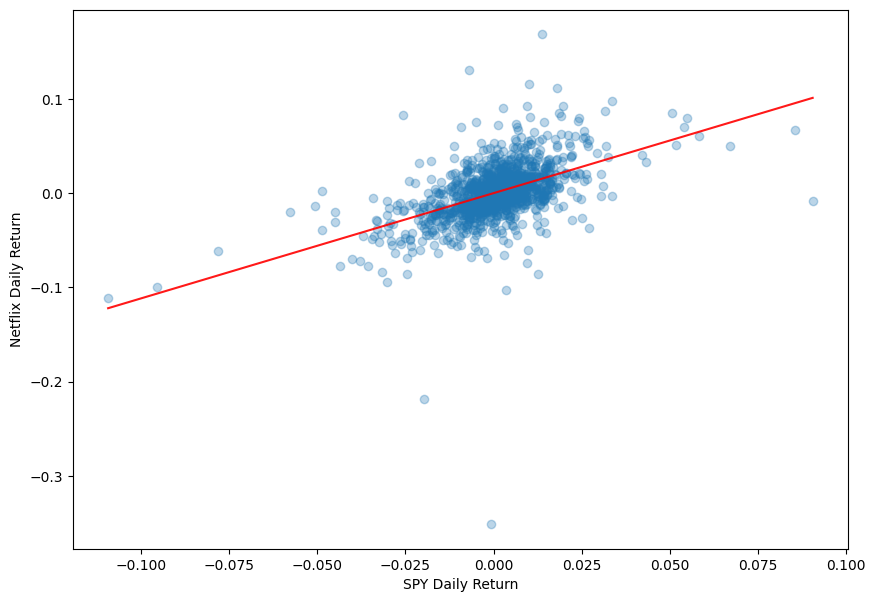

In [141]:
# Plotting
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Daily Return")
plt.ylabel("Netflix Daily Return")
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

Beta is an efficient and reliable tool for measuring the risk of your investment against market risk. Calculating beta helps a trader get a fair idea of the risk that a particular stock or portfolio is exposed to.